## Image Enhancements - Pointwise Operations

Sometimes, the quality of the image is very poor as the problems with the camera or lighting etc. So we can use various image processing techniques to enhance the quality of these images. So basically there are two types of operations that can be done on an image. One is using pointwise operations and the other one is using the neighbourhood of the pixels. So first we will see some pointwise operation techniques such as histogram modifications and contrast stretchings.

So pointwise operation techniques operate on a single point and change the pixel based on its own value. Later we will see how other pixels also affect the values of a certain pixel. Let's see a simple case here.

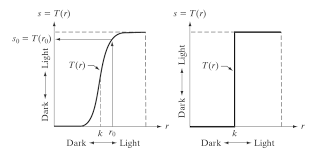

The points on the x-axis are the actual pixel intensity values and on the y-axis are the transformed intensity values. The function can be thought of as s = T(r) where r and s are the actual and transformed intensity values and T() is a function which tranforms r to s. The second image shows that if the pixel value is less than certain intensity (k), then it is transformed into 0 and the pixel values greater that k, then it is transformed into 255 (or 1 if it is normalized). The figure in the left shows a transformation function which is similar but somewhat smoother in comparison to the second image.

s = T(r) where r and s are the original and transformed pixels and T is the transformation function.

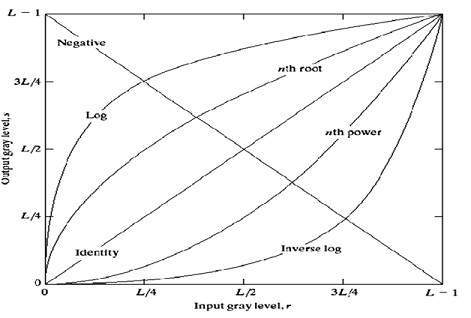

-  Identity transformation
-  Negative transformation
-  Log and Inverse log transformation
-  Gamma correction (nth power and nth root)

### Negative Transformation

In identity transformation, the output image is same as the input image. So s = r. In the negative transformation, the image produced is the negative or inverse of the original image. The function here is s = (L - 1) - r. So basically, the image pixel value is subtracted from 255 to get the negative of it. Below the python example shows how to produce the negative of an image.

In [39]:
from scipy import misc
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage

Import the required libraries as shown above. Then a function is written for plotting an image. So wherever any image plotting is required, this method with required arguments has to be called.

In [40]:
# function to plot images
def plot_image(plt,image,position,title,cmap=None):
    plt.subplot(position[0],position[1],position[2])
    plt.imshow(image, cmap)
    plt.title(title)
    plt.axis('off')
    return plt

A 2d array with random pixels ranging from 0 to 255 are produced with 100x100 dimensions. Then its negative matrix is produced by subtracting the values from 255. Both the original and transformed images are plotted.

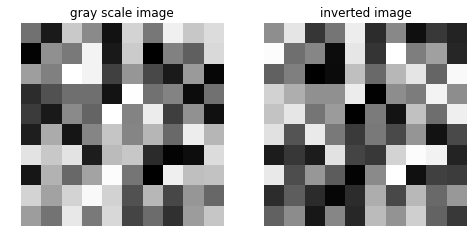

In [42]:
scale=10
gray_image = np.zeros([scale,scale],int)
for i in range(0,scale):
    gray_image[i,:] = np.random.randint(0,255,scale)

gray_image_inverted = [255-x for x in gray_image]
gray_image_inverted = np.asarray(gray_image_inverted)

plt.figure(figsize=(8,4))
plot_image(plt,gray_image,[1,2,1],'gray scale image',cmap='gray')
plot_image(plt,gray_image_inverted,[1,2,2],'inverted image',cmap='gray')

plt.show()

Above experiment is also tried with a cat face below to observe the negative effects. The cat face is present in the misc package inside scipy library.

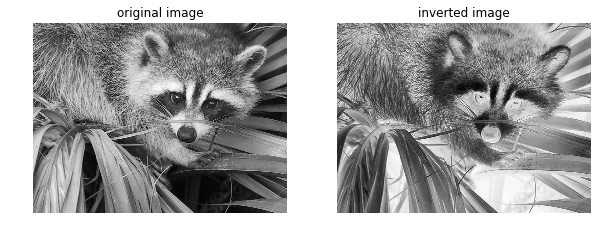

In [43]:
face = misc.face(gray=True)
face_inverted = np.invert(face)

plt.figure(figsize=(10,6))

plot_image(plt,face,[1,2,1],'original image',cmap='gray')
plot_image(plt,face_inverted,[1,2,2],'inverted image',cmap='gray')

plt.show()

### Log Transformation

The next one is the log transformation, where each pixel is replaced by its log. Log values ranges from 0 to 2.41 for the pixel values 0 to 255. So before plotting the values need to be scaled again back to 0 to 255 range. The transformation function here is s = cLog(r+1) (Log of 0 - undefined, so 1 is added)

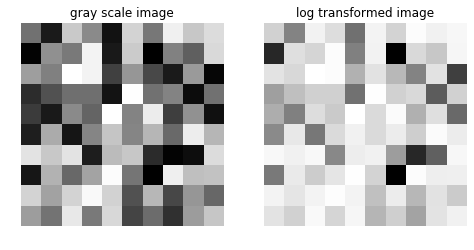

In [44]:
def log_transformation(gray_image):
    return np.asarray(255/np.log10(gray_image.max()+1)*np.log10(gray_image+1),int)

gray_image_log = log_transformation(gray_image)

plt.figure(figsize=(8,4))

plot_image(plt,gray_image,[1,2,1],'gray scale image',cmap='gray')
plot_image(plt,gray_image_log,[1,2,2],'log transformed image',cmap='gray')

plt.show()

Same experiment is done on the cat face image to observe the log effects on the image.

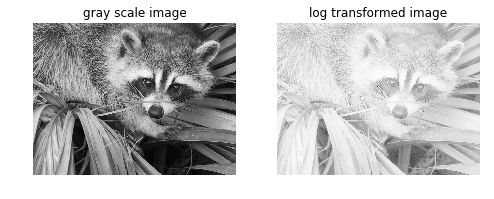

In [45]:
face_log = log_transformation(face)

plt.figure(figsize=(8,4))
plot_image(plt,face,[1,2,1],'gray scale image',cmap='gray')
plot_image(plt,face_log,[1,2,2],'log transformed image',cmap='gray')

plt.show()

Log operation transforms narrow range of low intensity values to higher range of values, and vice-versa. The reason for doing log transformation is it can make highly skewed distributions less skewed. This can be useful by making the data more interpretable in certain cases.

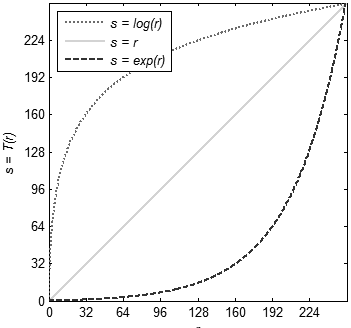

### Gamma Correction

Different camera or video recorder devices do not correctly capture luminance. (they are not linear) Different display devices (monitor, phone screen, TV) do not display luminance correctly neither. So, one needs to correct them, therefore the gamma correction function.

For gamma correction, the transformation function is s = cr^y, where r is the input image pixel, y is gamma and s is the transformed pixel respectively. Each pixel is replaced by its gamma corrected value in the transformed image. Gamma can be any value either an integer or a float point. To apply it on the pixel value of images, they need to be converted to 0 to 1 range by dividing with the highest pixel value (255). Then after the gamma correction is applied on the image it is converted back into the 0 to 255 range.

In [46]:
def gamma_transformation(gray_image,gamma):
    gray_image_norm = gray_image/255
    x = np.power(gray_image_norm,gamma)
    return np.asarray(x*255,int)

Gamma transformation is done on the gray image used above. Using a smaller gamma like 0.25 or 0.50 increases the pixel value of a darker pixel and image becomes lighter, whereas a higher gamma like 10 or 25 reduces the pixel value of a lighter pixel and image becomes darker comparitively.

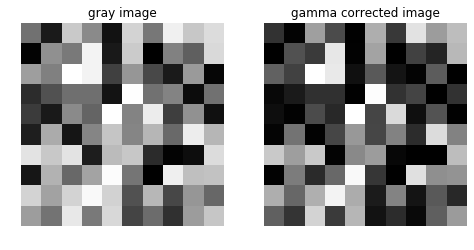

In [47]:
gamma = 2.0
gray_image_gamma = gamma_transformation(gray_image, gamma)

plt.figure(figsize=(8,4))
plot_image(plt,gray_image,[1,2,1],'gray image',cmap='gray')
plot_image(plt,gray_image_gamma,[1,2,2],'gamma corrected image',cmap='gray')

plt.show()

Same experiment is done with another image which is a very darker image, visually its hard to interpret the objects in the image. Using gamma correction, the quality of the image increases and it becomes easier to understand.

C:\Users\z003u7us.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


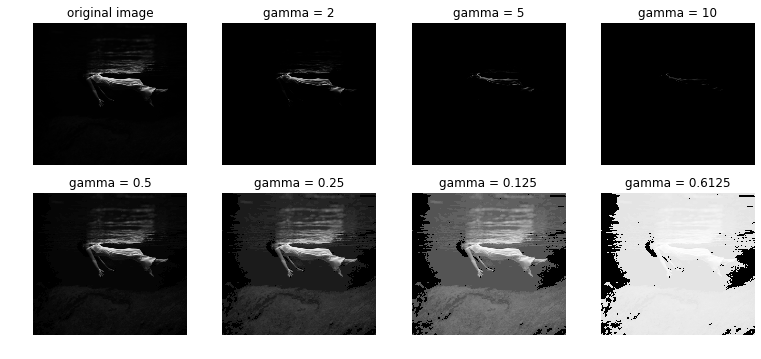

In [48]:
dog = ndimage.imread('D:\ml and dl\code\scikit-image\Images\woman.PNG')

plt.figure(figsize=(13, 12))

plt = plot_image(plt,dog,[4,4,1],title='original image')
plt = plot_image(plt,gamma_transformation(dog,2),[4,4,2],title='gamma = 2')
plt = plot_image(plt,gamma_transformation(dog,5),[4,4,3],title='gamma = 5')
plt = plot_image(plt,gamma_transformation(dog,10),[4,4,4],title='gamma = 10')
plt = plot_image(plt,gamma_transformation(dog,0.67),[4,4,5],title='gamma = 0.5')
plt = plot_image(plt,gamma_transformation(dog,0.40),[4,4,6],title='gamma = 0.25')
plt = plot_image(plt,gamma_transformation(dog,0.20),[4,4,7],title='gamma = 0.125')
plt = plot_image(plt,gamma_transformation(dog,0.02),[4,4,8],title='gamma = 0.6125')

plt.show()

Below effects of gamma correction on a image pixel values is shown using a graph with different values of gamma.

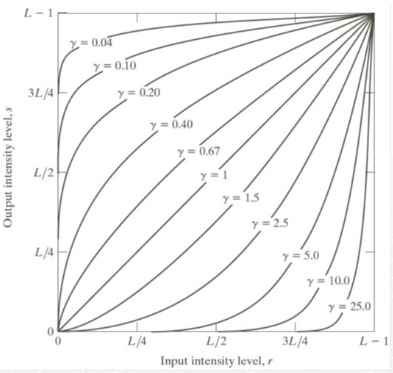

In this notebook, we saw some techniques which can enhance the quality of the image by operating pointwise. In the next notebook, we will see some techniques which can improve the quality of the image by using local neighbourhood/surrounding pixels. 